<a href="https://colab.research.google.com/github/K-2315/WIDS-/blob/main/WIDS%20WEEK%202%20LAB%204%20ASSIGNMENT%20SUBMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def z(x1, x2):
    return x1**2 + 4*x1*x2 + 4*(x2**2)

In [ ]:
def grad(x1, x2):
    return np.array([dz_dx1_func(x1, x2), dz_dx2_func(x1, x2)])

def hessian(x1, x2):
    return np.array([[d2z_dx12_func(x1, x2), d2z_dx1x2_func(x1, x2)],
                     [d2z_dx1x2_func(x1, x2), d2z_dx22_func(x1, x2)]])

def norm(x1, x2):
    return np.linalg.norm(grad(x1, x2))

def tolerance(p):
    return 10**(-p)


In [ ]:
x1, x2 = sp.symbols('x1 x2')

dz_dx1 = sp.diff(z(x1, x2), x1)
dz_dx2 = sp.diff(z(x1, x2), x2)
d2z_dx12 = sp.diff(dz_dx1, x1)
d2z_dx22 = sp.diff(dz_dx2, x2)
d2z_dx1x2 = sp.diff(dz_dx1, x2)

dz_dx1_func = sp.lambdify((x1, x2), dz_dx1, 'numpy')
dz_dx2_func = sp.lambdify((x1, x2), dz_dx2, 'numpy')
d2z_dx12_func = sp.lambdify((x1, x2), d2z_dx12, 'numpy')
d2z_dx22_func = sp.lambdify((x1, x2), d2z_dx22, 'numpy')
d2z_dx1x2_func = sp.lambdify((x1, x2), d2z_dx1x2, 'numpy')


In [ ]:
def algo(cp_x1,cp_x2,l_r):
    for i in range(1,11):
        norm1 = norm(cp_x1,cp_x2)
        Tlevel = tolerance(i)
        while(norm1 > Tlevel):
            cp_x1 = cp_x1 - l_r*grad(cp_x1,cp_x2)[0]
            cp_x2 = cp_x2 - l_r*grad(cp_x1,cp_x2)[1]
            norm1 = norm(cp_x1,cp_x2)
    return cp_x1, cp_x2, z(cp_x1,cp_x2)


In [ ]:
cp_x1, cp_x2,l_r = 45, 23,0.01
min_x1, min_x2, min_z = algo(cp_x1, cp_x2,l_r)
print(f"Minimum value of f(x): {min_z}")
print(f"Minimizing values: x1 = {min_x1}, x2 = {min_x2}")
print("Because of the nature of f(x), minimizer values will change as initial coordinates are changed")
print("Yes, f(x) is convex as d2f/dx1x1 is positive = ",hessian(cp_x1,cp_x2)[0][0]," and hessian is singular = ",0)

Minimum value of f(x): 0.0
Minimizing values: x1 = 26.504065040654606, x2 = -13.252032520316906
Because of the nature of f(x), minimizer values will change as initial coordinates are changed
Yes, f(x) is convex as d2f/dx1x1 is positive =  2  and hessian is singular =  0


In [ ]:

def f(x):
    x1, x2 = x
    return x1**2 + 4*x1*x2 + 4*x2**2

def grad_f(x):
    x1, x2 = x
    return np.array([2*x1 + 4*x2, 4*x1 + 8*x2])


def backtracking_line_search(x, coord, alpha, gamma, rho):
    t = alpha
    for _ in range(100):
        x_new = x.copy()
        x_new[coord] -= t * grad_f(x)[coord]
        if f(x_new) <= f(x) - rho * t * grad_f(x)[coord]**2:
            break
        t *= gamma
    return t

def coordinate_descent_with_backtracking(x0, tau, alpha, gamma, rho):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    num_iterations = 0

    while np.linalg.norm(grad_f(x), ord=2) > tau:
        for coord in range(len(x)):
            t = backtracking_line_search(x, coord, alpha, gamma, rho)
            x[coord] -= t * grad_f(x)[coord]
        trajectory.append(x.copy())
        num_iterations += 1

    return x, f(x), num_iterations, np.array(trajectory)

x0 = [1, 40]
tau = 1e-5
alpha = 1
gamma = 0.5
rho_values = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

results = []

for rho in rho_values:
    final_x, final_f, num_iterations, trajectory = coordinate_descent_with_backtracking(x0, tau, alpha, gamma, rho)
    results.append((rho, final_x, final_f, num_iterations, trajectory))

plt.figure(figsize=(10, 6))
plt.plot([r[0] for r in results], [r[3] for r in results], marker='o', label='Iterations vs $\rho$')
plt.xlabel('$\rho$', fontsize=14)
plt.ylabel('Number of Iterations', fontsize=14)
plt.title('Number of Iterations vs $\rho$', fontsize=16)
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

x1_vals = np.linspace(-50, 50, 400)
x2_vals = np.linspace(-50, 50, 400)
x1, x2 = np.meshgrid(x1_vals, x2_vals)

z = f([x1, x2])
plt.figure(figsize=(10, 8))

contour = plt.contour(x1, x2, z, levels=np.logspace(0, 5, 35), cmap='viridis')
plt.colorbar(contour)

colors = plt.cm.viridis(np.linspace(0, 1, len(rho_values)))
for i, (rho, _, _, _, trajectory) in enumerate(results):
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', label=f'$\rho={rho}$', color=colors[i])

plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Trajectory of Coordinate Descent with Level Sets', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

print("Results:")
for rho, final_x, final_f, num_iterations, _ in results:
    print(f"\nRho: {rho}")
    print(f"Final Minimizer: {final_x}")
    print(f"Final Objective Value: {final_f}")
    print(f"Number of Iterations: {num_iterations}")



KeyboardInterrupt: 

In [ ]:
def f(x):
    return (x[0] - 1)**2 + x[1]**2 + (x[2] + 1)**2

def gradient_f(x):
    return np.array([2 * (x[0] - 1), 2 * x[1], 2 * (x[2] + 1)])


def prox_L(y):
    return np.maximum(y, 0)


def proximal_gradient_descent(x0, eta, T):
    x = np.array(x0, dtype=float)
    for _ in range(T):
        y = x - eta * gradient_f(x)
        x = prox_L(y)
    return x


x0 = [0, 0, 0]
eta = 0.3
T_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
theoretical_optimal_value = 0


results = []

for T in T_values:
    x_final = proximal_gradient_descent(x0, eta, T)
    final_objective = f(x_final)
    percentage_error = abs(final_objective - theoretical_optimal_value) / (theoretical_optimal_value + 1e-12) * 100
    results.append((T, x_final, final_objective, percentage_error))

print(f"{'T':>10} {'x_final':>30} {'f(x)':>10} {'% Error':>10}")
for T, x_final, final_objective, percentage_error in results:
    print(f"{T:>10} {str(x_final):>30} {final_objective:>10.6f} {percentage_error:>10.6f}")

print("You can see that x3 minimum value reaches 0 even though it can be clearly shown that function minimum value takes when x3 = -1. It is because of the proxximal operator that doesnt allow negative component of x")



         T                        x_final       f(x)    % Error
       100                     [1. 0. 0.]   1.000000 100000000000000.000000
       500                     [1. 0. 0.]   1.000000 100000000000000.000000
      1000                     [1. 0. 0.]   1.000000 100000000000000.000000
      5000                     [1. 0. 0.]   1.000000 100000000000000.000000
     10000                     [1. 0. 0.]   1.000000 100000000000000.000000
     50000                     [1. 0. 0.]   1.000000 100000000000000.000000
    100000                     [1. 0. 0.]   1.000000 100000000000000.000000
    500000                     [1. 0. 0.]   1.000000 100000000000000.000000
   1000000                     [1. 0. 0.]   1.000000 100000000000000.000000
   5000000                     [1. 0. 0.]   1.000000 100000000000000.000000
You can see that x3 minimum value reaches 0 even though it can be clearly shown that function minimum value takes when x3 = -1. It is because of the proxximal operator that doe

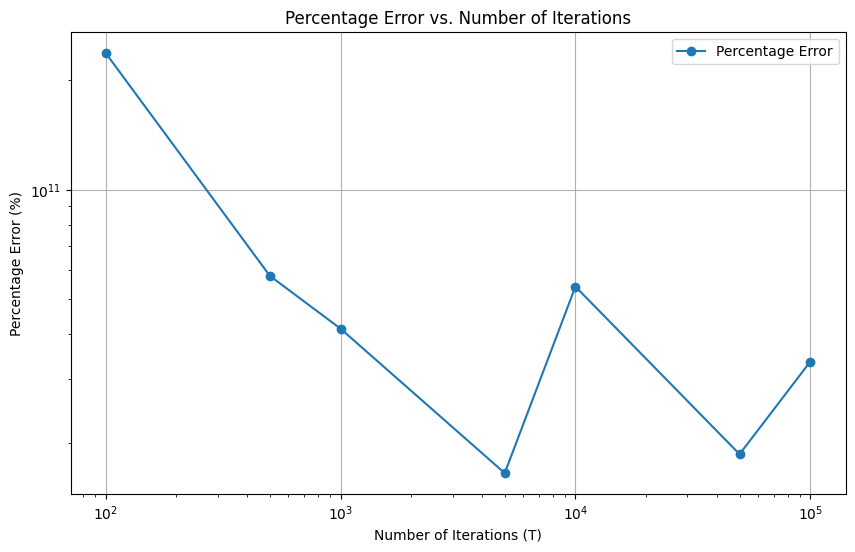

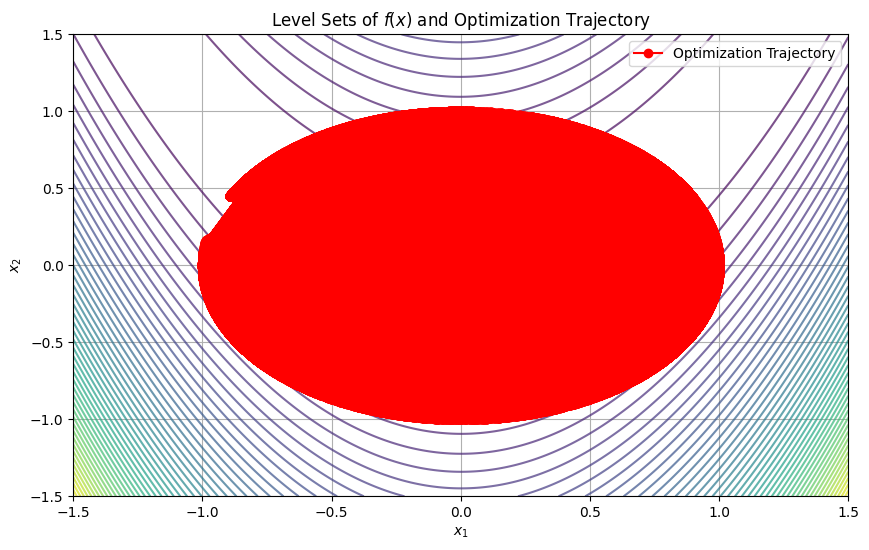

T = 100: Minimizer = [-0.58136612  0.81364208], Objective Value = 23.794169439166595, Percentage Error = 237941694391.665924%, Iterations = 100
T = 500: Minimizer = [-0.85097347  0.52520868], Objective Value = 5.783126419728767, Percentage Error = 57831264197.287666%, Iterations = 500
T = 1000: Minimizer = [0.85137392 0.52455929], Objective Value = 4.1346020207462955, Percentage Error = 41346020207.462952%, Iterations = 1000
T = 5000: Minimizer = [-0.78389849  0.62088901], Objective Value = 1.6524813112283943, Percentage Error = 16524813112.283941%, Iterations = 5000
T = 10000: Minimizer = [-0.7107071   0.70348803], Objective Value = 5.401410748380519, Percentage Error = 54014107483.805183%, Iterations = 10000
T = 50000: Minimizer = [0.83041863 0.55713993], Objective Value = 1.863613490804831, Percentage Error = 18636134908.048309%, Iterations = 50000
T = 100000: Minimizer = [0.84518558 0.53447295], Objective Value = 3.3543204971263885, Percentage Error = 33543204971.263885%, Iteration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (0.5 - x[0]) ** 2

def grad_f(x):
    dfdx1 = -400 * (x[1] - x[0] ** 2) * x[0] - 2 * (0.5 - x[0])
    dfdx2 = 200 * (x[1] - x[0] ** 2)
    return np.array([dfdx1, dfdx2])

def prox_L(y):
    norm_y = np.linalg.norm(y)
    if norm_y > 1:
        return y / norm_y
    return y


def proximal_gradient_descent(x0, eta, T, tol=1e-9):
    x = x0
    trajectory = [x0]
    for t in range(T):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        y = x - eta * grad
        x = prox_L(y)
        trajectory.append(x)
    return x, trajectory, t+1

optimal_value = 0

x0 = np.array([0.0, 0.0])
eta = 0.2
T_values = [100, 500, 1000, 5000, 10000, 50000, 100000]


results = []
errors = []
iterations = []

for T in T_values:
    x_min, trajectory, iters = proximal_gradient_descent(x0, eta, T)
    f_min = f(x_min)
    error = 100 * abs(f_min - optimal_value) / max(abs(optimal_value), 1e-8)
    results.append((x_min, f_min, error))
    errors.append(error)
    iterations.append(iters)


plt.figure(figsize=(10, 6))
plt.plot(T_values, errors, marker='o', label='Percentage Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Iterations (T)')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error vs. Number of Iterations')
plt.legend()
plt.grid()
plt.show()

x_vals = np.linspace(-1.5, 1.5, 400)
y_vals = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 100 * (Y - X**2)**2 + (0.5 - X)**2

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)

trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Level Sets of $f(x)$ and Optimization Trajectory')
plt.legend()
plt.grid()
plt.show()

output_results = []
for i, T in enumerate(T_values):
    x_min, f_min, error = results[i]
    print(f"T = {T}: Minimizer = {x_min}, Objective Value = {f_min}, Percentage Error = {error:.6f}%, Iterations = {iterations[i]}")


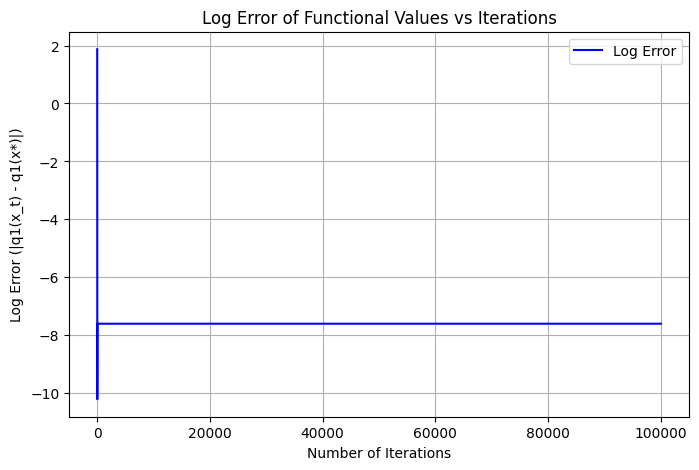

Minimiser x1 = 1.001, x2 = -0.0316227766016838
Minimum value of q1(x) = -0.5005000000000001


In [ ]:


def q1(x, t):
    x1, x2 = x
    return 0.5 * (x1**2 + (1 + t) * x2**2 + 2 * np.sqrt(t) * x1 * x2 - 2 * x1)

def grad_q1(x, t):
    x1, x2 = x
    grad_x1 = x1 + np.sqrt(t) * x2 - 1
    grad_x2 = (1 + t) * x2 + np.sqrt(t) * x1
    return np.array([grad_x1, grad_x2])


x0 = np.array([3.0, 5.0])
t_val = 0.001
tau = 1e-8
max_iter = 1000

def compute_alpha_beta(t):
    sqrt_term = np.sqrt(9 - 4 * t**2)
    alpha_k = 2 / (3 + sqrt_term)
    mu_0 = (3 + sqrt_term) / (3 - sqrt_term)
    beta_k = (np.sqrt(mu_0) - 1) / (np.sqrt(mu_0) + 1)
    return alpha_k, beta_k

x_star = np.array([1, 0])

x_t = x0.copy()
y_t = x0.copy()
log_errors = []
alpha_k, beta_k = compute_alpha_beta(t_val)

for i in range(100000):
    grad = grad_q1(y_t, t_val)
    x_next = y_t - alpha_k * grad
    y_t = x_next + beta_k * (x_next - x_t)
    x_t = x_next
    error = np.abs(q1(x_t, t_val) - q1(x_star, t_val))
    log_errors.append(np.log(error) if error > 0 else -np.inf)
    if error < tau:
        break

plt.figure(figsize=(8, 5))
plt.plot(range(len(log_errors)), log_errors, label="Log Error", color='blue')
plt.xlabel("Number of Iterations")
plt.ylabel("Log Error (|q1(x_t) - q1(x*)|)")
plt.title("Log Error of Functional Values vs Iterations")
plt.grid(True)
plt.legend()
plt.show()

print(f"Minimiser x1 = {x_t[0]}, x2 = {x_t[1]}")
print(f"Minimum value of q1(x) = {q1(x_t, t_val)}")


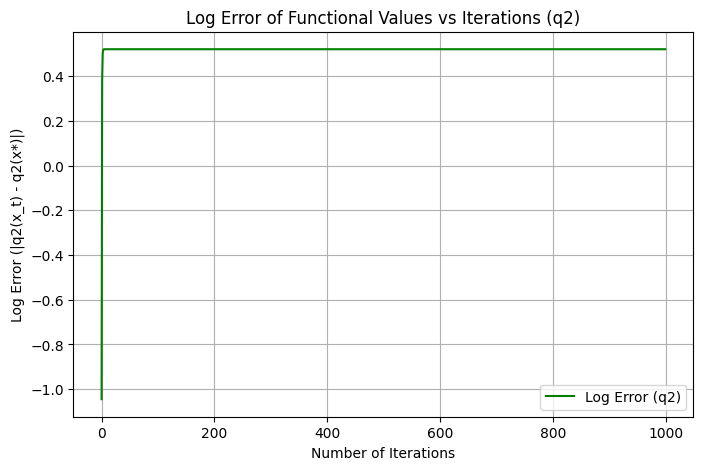

Minimizer x1 =0.0909090909090909, x2 = 0.6363636363636364
Minimum value of q2(x) = -0.6818181818181819


In [ ]:

def q2(x):
    x1, x2 = x
    return 2 * x1**2 + x1 * x2 + 1.5 * x2**2 - x1 - 2 * x2

def grad_q2(x):
    x1, x2 = x
    grad_x1 = 4 * x1 + x2 - 1
    grad_x2 = x1 + 3 * x2 - 2
    return np.array([grad_x1, grad_x2])


x0 = np.array([3.0, 5.0])
tau = 1e-8
max_iter = 1000



sqrt_5 = np.sqrt(5)
alpha_k = 2 / (7 + sqrt_5)
mu_0 = (7 + sqrt_5) / (7 - sqrt_5)
beta_k = (np.sqrt(mu_0) - 1) / (np.sqrt(mu_0) + 1)
x_star_q2 = np.array([1, 0])
x_t = x0.copy()
y_t = x0.copy()
log_errors_q2 = []

for i in range(max_iter):
    grad = grad_q2(y_t)
    x_next = y_t - alpha_k * grad
    y_t = x_next + beta_k * (x_next - x_t)
    x_t = x_next
    error = np.abs(q2(x_t) - q2(x_star_q2))
    log_errors_q2.append(np.log(error) if error > 0 else -np.inf)
    if error < tau:
        break

plt.figure(figsize=(8, 5))
plt.plot(range(len(log_errors_q2)), log_errors_q2, label="Log Error (q2)", color='green')
plt.xlabel("Number of Iterations")
plt.ylabel("Log Error (|q2(x_t) - q2(x*)|)")
plt.title("Log Error of Functional Values vs Iterations (q2)")
plt.grid(True)
plt.legend()
plt.show()
print(f"Minimizer x1 ={x_t[0]}, x2 = {x_t[1]}")
print(f"Minimum value of q2(x) = {q2(x_t)}")



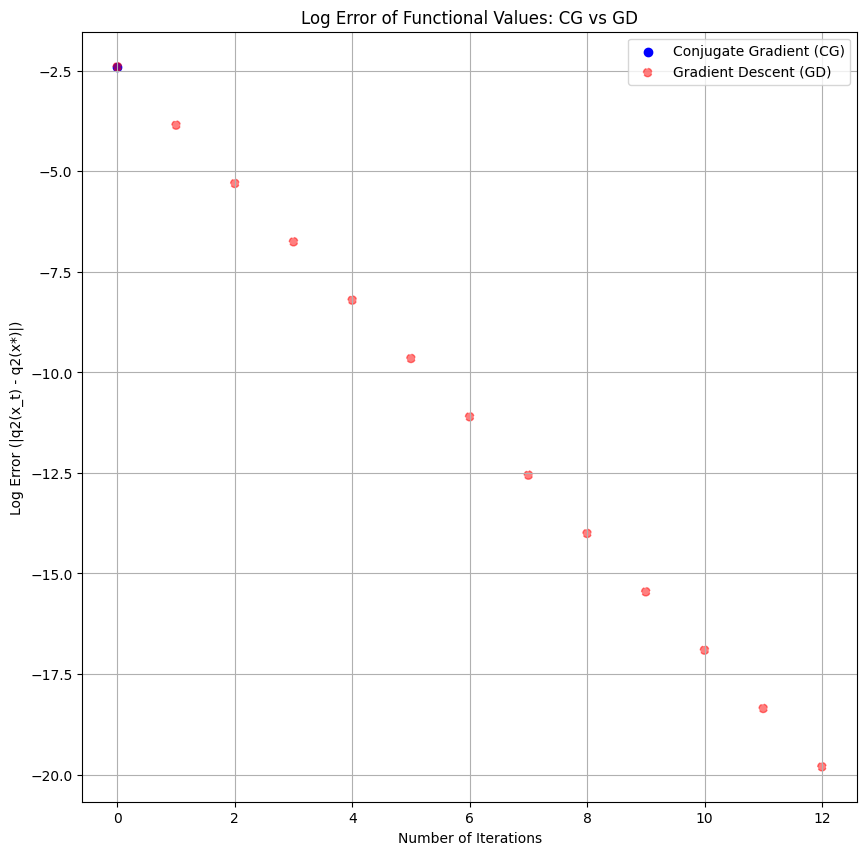

Minimizer x1 = 0.09090909090909147, Minimizer x2 = 0.6363636363636366
Minimum value of q2(x) = -0.6818181818181819


In [ ]:
def grad_q2(x):
    x1, x2 = x
    grad_x1 = 4 * x1 + x2 - 1
    grad_x2 = x1 + 3 * x2 - 2
    return np.array([grad_x1, grad_x2])


H_q2 = np.array([[4, 1], [1, 3]])


def q2(x):
    x1, x2 = x
    return 2 * x1**2 + x1 * x2 + 1.5 * x2**2 - x1 - 2 * x2


x0_cg = np.array([5.0, 3.0])
x0_gd = np.array([5.0, 3.0])
tau = 1e-8
max_iter = 1000
alpha_gd = 2 / (7 + np.sqrt(5))
x_star_q2 = np.linalg.solve(H_q2, np.array([1, 2]))  \
x_cg = x0_cg.copy()
r_cg = -grad_q2(x_cg)
p_cg = r_cg.copy()
log_errors_cg = []

for i in range(max_iter):
    Ap = H_q2 @ p_cg
    alpha_cg = r_cg @ r_cg / (p_cg @ Ap)
    x_cg = x_cg + alpha_cg * p_cg
    r_new = r_cg - alpha_cg * Ap
    error = np.abs(q2(x_cg) - q2(x_star_q2))
    log_errors_cg.append(np.log(error) if error > 0 else -np.inf)
    if error < tau:
        break
    beta_cg = (r_new @ r_new) / (r_cg @ r_cg)
    p_cg = r_new + beta_cg * p_cg
    r_cg = r_new.copy()

x_gd = x0_gd.copy()
log_errors_gd = []

for i in range(max_iter):
    grad = grad_q2(x_gd)
    x_gd = x_gd - alpha_gd * grad
    error = np.abs(q2(x_gd) - q2(x_star_q2))
    log_errors_gd.append(np.log(error) if error > 0 else -np.inf)
    if error < tau:
        break

plt.figure(figsize=(10, 10))
plt.scatter(range(len(log_errors_cg)), log_errors_cg, label="Conjugate Gradient (CG)", color='blue')
plt.scatter(range(len(log_errors_gd)), log_errors_gd, label="Gradient Descent (GD)", color='red', alpha = 0.5, linestyle='--')
plt.xlabel("Number of Iterations")
plt.ylabel("Log Error (|q2(x_t) - q2(x*)|)")
plt.title("Log Error of Functional Values: CG vs GD")
plt.grid(True)
plt.legend()
plt.show()

print(f"Minimizer x1 = {x_cg[0]}, Minimizer x2 = {x_cg[1]}")
print(f"Minimum value of q2(x) = {q2(x_cg)}")
